# 数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import matplotlib as mpl
from math import *
from sklearn.linear_model import LinearRegression
hb_reviews = pd.read_csv("./data/hotel_bookings.csv")
hb_reviews
#数据导入

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 基本情况

In [2]:
#预定需求

In [3]:
hotel_reviews = hb_reviews.groupby('hotel').hotel.count().sort_values()
hotel_reviews

hotel
Resort Hotel    40060
City Hotel      79330
Name: hotel, dtype: int64

In [4]:
#城市酒店和假日酒店预定人数比较

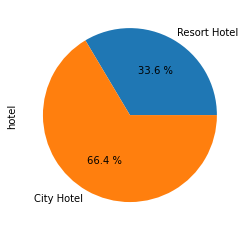

In [5]:
hotel_reviews.plot.pie(autopct = '%3.1f %%')

In [6]:
#分析：入住城市酒店的比例更多，占到接近2/3.

In [7]:
#入住率

In [8]:
def judge_is_canceled(hotel,is_canceled):
    if is_canceled == 1 and hotel == 'City Hotel':
        return 'City Hotel Canceled'
    elif is_canceled == 0 and hotel == 'City Hotel':
        return 'City Hotel Check in'
    elif is_canceled == 1 and hotel == 'Resort Hotel':
        return 'Resort Hotel Canceled'
    elif is_canceled == 0 and hotel == 'Resort Hotel':
        return 'Resort Hotel Check in'

hb_reviews['hotel_trans'] = hb_reviews.apply(lambda x: judge_is_canceled(x.hotel , x.is_canceled) , axis = 1)
hotel_trans_reviews = hb_reviews.groupby('hotel_trans').hotel_trans.count().sort_values()
hotel_trans_reviews

hotel_trans
Resort Hotel Canceled    11122
Resort Hotel Check in    28938
City Hotel Canceled      33102
City Hotel Check in      46228
Name: hotel_trans, dtype: int64

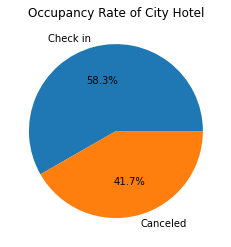

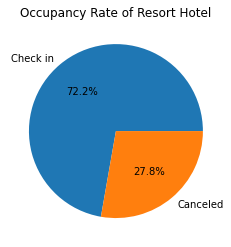

In [9]:
city_hotel_num = pd.Series({'Check in' : 46228/(33102+46228), 'Canceled' : 33102/(33102+46228)})
city_hotel_num.name = ''
resort_hotel_num = pd.Series({'Check in' : 28938/(11122+28938), 'Canceled' : 11122/(11122+28938)})
resort_hotel_num.name = ''
#画图
plt.axes(aspect = 'equal')
city_hotel_num.plot(kind = 'pie', autopct='%.1f%%', title = 'Occupancy Rate of City Hotel')
plt.figure()
resort_hotel_num.plot(kind = 'pie', autopct='%.1f%%', title = 'Occupancy Rate of Resort Hotel')
plt.show()

In [10]:
#分析：城市酒店预订的取消率更高。

# 用户行为

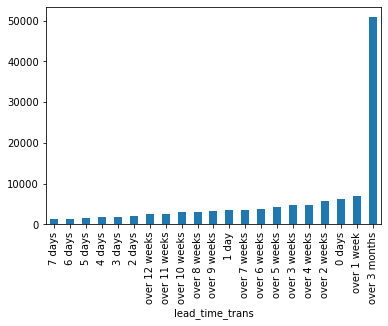

In [11]:
#提前预定时间
def judge_lead_time(lead_time):
    if lead_time == 0:
        return '0 days'
    elif lead_time == 1:
        return '1 day'
    elif lead_time == 2:
        return '2 days'
    elif lead_time == 3:
        return '3 days'
    elif lead_time == 4:
        return '4 days'
    elif lead_time == 5:
        return '5 days'
    elif lead_time == 6:
        return '6 days'
    elif lead_time == 7:
        return '7 days'
    elif lead_time > 7 and lead_time <= 14:
        return 'over 1 week'
    elif lead_time > 14 and lead_time <= 21:
        return 'over 2 weeks'
    elif lead_time > 21 and lead_time <= 28:
        return 'over 3 weeks'
    elif lead_time > 28 and lead_time <= 35:
        return 'over 4 weeks'
    elif lead_time > 35 and lead_time <= 42:
        return 'over 5 weeks'
    elif lead_time > 42 and lead_time <= 49:
        return 'over 6 weeks'
    elif lead_time > 49 and lead_time <= 56:
        return 'over 7 weeks'
    elif lead_time > 56 and lead_time <= 63:
        return 'over 8 weeks'
    elif lead_time > 63 and lead_time <= 70:
        return 'over 9 weeks'
    elif lead_time > 70 and lead_time <= 77:
        return 'over 10 weeks'
    elif lead_time > 77 and lead_time <= 84:
        return 'over 11 weeks'
    elif lead_time > 84 and lead_time <= 91:
        return 'over 12 weeks'
    elif lead_time > 91:
        return 'over 3 months'

hb_reviews['lead_time_trans'] = hb_reviews.apply(lambda x: judge_lead_time(x.lead_time) , axis = 1)
lead_time_trans_reviews = hb_reviews.groupby('lead_time_trans').lead_time_trans.count().sort_values()
lead_time_trans_reviews.plot.bar()


In [12]:
#占总数的百分比
print(100*lead_time_trans_reviews/sum(lead_time_trans_reviews))

lead_time_trans
7 days            1.114834
6 days            1.210319
5 days            1.310830
4 days            1.436469
3 days            1.521065
2 days            1.732976
over 12 weeks     2.215428
over 11 weeks     2.225480
over 10 weeks     2.519474
over 8 weeks      2.629198
over 9 weeks      2.748974
1 day             2.898065
over 7 weeks      2.999414
over 6 weeks      3.096574
over 5 weeks      3.666136
over 3 weeks      4.027138
over 4 weeks      4.080744
over 2 weeks      4.820337
0 days            5.314515
over 1 week       5.884915
over 3 months    42.547114
Name: lead_time_trans, dtype: float64


In [13]:
#分析：有42%的人会提前3个月以上规划行程，没有提前预订的人更可能在入住1-2周前预订或入住当天预订。

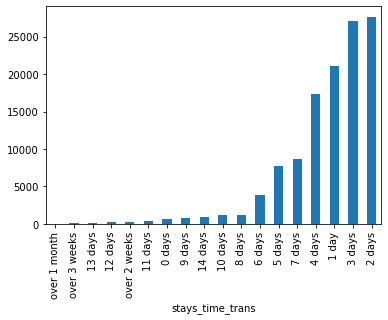

In [14]:
#入住时长
def judge_stays_time(stays_in_weekend_nights,stays_in_week_nights):
    if stays_in_weekend_nights + stays_in_week_nights == 0:
        return '0 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 1:
        return '1 day'
    elif stays_in_weekend_nights + stays_in_week_nights == 2:
        return '2 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 3:
        return '3 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 4:
        return '4 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 5:
        return '5 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 6:
        return '6 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 7:
        return '7 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 8:
        return '8 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 9:
        return '9 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 10:
        return '10 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 11:
        return '11 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 12:
        return '12 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 13:
        return '13 days'
    elif stays_in_weekend_nights + stays_in_week_nights == 14:
        return '14 days'
    elif stays_in_weekend_nights + stays_in_week_nights > 14 and stays_in_weekend_nights + stays_in_week_nights <= 21:
        return 'over 2 weeks'
    elif stays_in_weekend_nights + stays_in_week_nights > 21 and stays_in_weekend_nights + stays_in_week_nights <= 28:
        return 'over 3 weeks'
    elif stays_in_weekend_nights + stays_in_week_nights > 28:
        return 'over 1 month'

hb_reviews['stays_time_trans'] = hb_reviews.apply(lambda x: judge_stays_time(x.stays_in_weekend_nights , x.stays_in_week_nights) , axis = 1)
stays_time_trans_reviews = hb_reviews.groupby('stays_time_trans').stays_time_trans.count().sort_values()
stays_time_trans_reviews.plot.bar()

In [15]:
#占总数的百分比
print(100*stays_time_trans_reviews/sum(stays_time_trans_reviews))

stays_time_trans
over 1 month     0.042717
over 3 weeks     0.092973
13 days          0.118938
12 days          0.186783
over 2 weeks     0.232013
11 days          0.331686
0 days           0.598878
9 days           0.704414
14 days          0.767233
10 days          0.954016
8 days           0.972443
6 days           3.230589
5 days           6.519809
7 days           7.249351
4 days          14.559846
1 day           17.606165
3 days          22.678616
2 days          23.153530
Name: stays_time_trans, dtype: float64


In [16]:
#分析：绝大多数人入住时长在不超过一周，其中又以1-4天为多数。

In [17]:
#预订等待间隔时间
def judge_days_in_waiting_list(days_in_waiting_list):
    if days_in_waiting_list == 0:
        return '0 days'
    elif days_in_waiting_list <=7:
        return 'less than 1 week'
    elif days_in_waiting_list > 7 and days_in_waiting_list <= 14:
        return 'over 1 week'
    elif days_in_waiting_list > 14 and days_in_waiting_list <= 21:
        return 'over 2 weeks'
    elif days_in_waiting_list > 21 and days_in_waiting_list <= 28:
        return 'over 3 weeks'
    elif days_in_waiting_list > 28:
        return 'over 1 month'

hb_reviews['days_in_waiting_list_trans'] = hb_reviews.apply(lambda x: judge_days_in_waiting_list(x.days_in_waiting_list) , axis = 1)
days_in_waiting_list_trans_reviews = hb_reviews.groupby('days_in_waiting_list_trans').days_in_waiting_list_trans.count().sort_values()
#占总数的百分比
print(100*days_in_waiting_list_trans_reviews/sum(days_in_waiting_list_trans_reviews))

days_in_waiting_list_trans
over 1 week          0.061982
less than 1 week     0.108049
over 3 weeks         0.153279
over 2 weeks         0.170869
over 1 month         2.603233
0 days              96.902588
Name: days_in_waiting_list_trans, dtype: float64


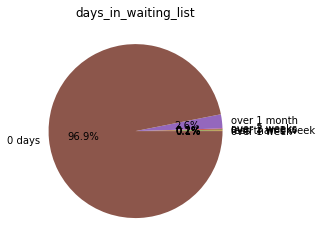

In [18]:
days_in_waiting_list_trans_num = days_in_waiting_list_trans_reviews/sum(days_in_waiting_list_trans_reviews)
days_in_waiting_list_trans_num.name = ''
#画图
plt.axes(aspect = 'equal')
days_in_waiting_list_trans_num.plot(kind = 'pie', autopct='%.1f%%', title = 'days_in_waiting_list')
plt.show()

In [19]:
#分析：通常情况下，预订等待时间不会超过1天，长期等待可能是其他特殊因素造成。

In [20]:
#餐食预订情况
meal_reviews = hb_reviews.groupby('meal').meal.count().sort_values()
meal_reviews

meal
FB             798
Undefined     1169
SC           10650
HB           14463
BB           92310
Name: meal, dtype: int64

In [21]:
100*meal_reviews/sum(meal_reviews)

meal
FB            0.668398
Undefined     0.979144
SC            8.920345
HB           12.114080
BB           77.318033
Name: meal, dtype: float64

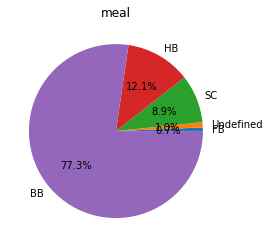

In [22]:
meal_num = meal_reviews/sum(meal_reviews)
meal_num.name = ''
#画图
plt.axes(aspect = 'equal')
meal_num.plot(kind = 'pie', autopct='%.1f%%', title = 'meal')
plt.show()

In [23]:
#分析：77.3%的客户选择预订早餐服务，12%的客户选择早晚餐服务，10%的客户没有选择订餐，仅有少于1%的客户选择预订三餐。

# 一年中最佳预订酒店时间

In [24]:
arrival_date_month_reviews = hb_reviews.groupby('arrival_date_month').arrival_date_month.count().sort_values()
arrival_date_month_reviews

arrival_date_month
January       5929
December      6780
November      6794
February      8068
March         9794
September    10508
June         10939
April        11089
October      11160
May          11791
July         12661
August       13877
Name: arrival_date_month, dtype: int64

In [25]:
hb_check_adr = hb_reviews[['arrival_date_month','adr']]
hb_January = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='January']
hb_December = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='December']
hb_November = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='November']
hb_February = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='February']
hb_March = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='March']
hb_September = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='September']
hb_June = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='June']
hb_April = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='April']
hb_October = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='October']
hb_May = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='May']
hb_July = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='July']
hb_August = hb_check_adr.loc[hb_check_adr['arrival_date_month']=='August']

In [26]:
#1月入住酒店价格的四分位数
np.percentile(hb_January.adr, (25, 50, 75))

array([51., 71., 85.])

In [27]:
#2月入住酒店价格的四分位数
np.percentile(hb_February.adr, (25, 50, 75))

array([56. , 75. , 87.3])

In [28]:
#3月入住酒店价格的四分位数
np.percentile(hb_March.adr, (25, 50, 75))

array([62.    , 79.2   , 95.6925])

In [29]:
#4月入住酒店价格的四分位数
np.percentile(hb_April.adr, (25, 50, 75))

array([ 77. ,  96.3, 119. ])

In [30]:
#5月入住酒店价格的四分位数
np.percentile(hb_May.adr, (25, 50, 75))

array([ 80.1, 108. , 132.6])

In [31]:
#6月入住酒店价格的四分位数
np.percentile(hb_June.adr, (25, 50, 75))

array([ 92., 115., 135.])

In [32]:
#7月入住酒店价格的四分位数
np.percentile(hb_July.adr, (25, 50, 75))

array([ 90. , 118.1, 155.1])

In [33]:
#8月入住酒店价格的四分位数
np.percentile(hb_August.adr, (25, 50, 75))

array([ 95. , 130.5, 180. ])

In [34]:
#9月入住酒店价格的四分位数
np.percentile(hb_September.adr, (25, 50, 75))

array([ 74.8975, 100.3   , 130.    ])

In [35]:
#10月入住酒店价格的四分位数
np.percentile(hb_October.adr, (25, 50, 75))

array([ 62.  ,  85.67, 109.65])

In [36]:
#11月入住酒店价格的四分位数
np.percentile(hb_November.adr, (25, 50, 75))

array([51.84, 73.  , 90.  ])

In [37]:
#12月入住酒店价格的四分位数
np.percentile(hb_December.adr, (25, 50, 75))

array([58.275, 75.   , 96.   ])

In [38]:
#分析：综合房间价格和入住人数来看，一年中最适合选择预订1月作为入住时期。

# 利用Logistic预测酒店预订

In [39]:
def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))
#定义激活函数

In [40]:
def gradAscent(dataMat, labelMat): 
    dataMatrix=mat(dataMat) 
    classLabels=mat(labelMat).transpose() 
    m,n = shape(dataMatrix)
    alpha = 0.001  
    maxCycles = 200 
    weights = ones((n,1)) 
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (classLabels - h)     
        weights = weights + alpha * dataMatrix.transpose()* error 
    return weights
#梯度上升求最优参数

In [41]:
def loadDataSet():   
    dataMat = []
    labelMat = []
    hb_db = pd.read_csv("./data/hotel_bookings.csv")
    hb_db_arr = hb_db.values
    train_range = 100
    for n in range(0,train_range):
        dataMat.append([1.0, hb_db_arr[n,2], hb_db_arr[n,27]]) 
        labelMat.append(int(hb_db_arr[n,1]))
    return dataMat,labelMat

<ipython-input-39-b6cb3047ae4d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-inX))


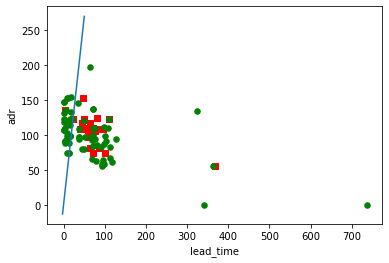

In [42]:
dataMat, labelMat = loadDataSet()
weights = gradAscent(dataMat, labelMat).getA()
dataMat,labelMat=loadDataSet()
dataArr = array(dataMat)
n = shape(dataArr)[0]
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []
for i in range(n):
    if int(labelMat[i])== 1:
        xcord1.append(dataArr[i,1])
        ycord1.append(dataArr[i,2])
    else:
        xcord2.append(dataArr[i,1])
        ycord2.append(dataArr[i,2])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')
x = arange(-3.0, 50.0, 0.1)
y = (-weights[0]-weights[1]*x)/weights[2]
ax.plot(x, y)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.show()


In [43]:
#分析：用提前预定时间和房间价格进行Logistic分类预测